<a href="https://colab.research.google.com/github/madakixo/substr_/blob/main/earthworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# analysing substructural works and predicting


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#load dataset
works = pd.read_csv("/content/drive/MyDrive/substructure.csv")

In [7]:
#view dataset
works.head()

,work_item,length,width,height,thickness,depth,qty,price,amount
0,topsoil,35.0,17.56,1.0,1.0,1.0,614.60,150.0,92190.00
1,trench,145.0,0.69,1.0,1.0,0.9,90.05,950.0,85542.75
2,cart_away,145.0,0.23,0.6,1.0,1.0,20.01,750.0,15007.50
3,surf_trmnt,145.0,0.69,0.9,1.0,2.0,180.09,250.0,45022.50
4,erthwk_spprt,185.0,1.00,0.9,1.0,1.0,166.50,1250.0,208125.00


In [8]:
works.describe()

,length,width,height,thickness,depth,qty,price,amount
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,1.600000e+01
mean,112.445000,5.605625,0.905000,0.671875,1.118750,153.594375,4784.375000,2.762324e+05
std,55.520381,7.787008,0.238188,0.396640,0.344903,186.043948,12216.965236,3.994217e+05
min,32.860000,0.230000,0.230000,0.000000,0.900000,4.830000,150.000000,6.578000e+03
25%,34.925000,0.407500,0.900000,0.300000,1.000000,38.237500,250.000000,2.426212e+04
50%,144.000000,0.690000,1.000000,1.000000,1.000000,95.050000,1100.000000,8.886638e+04
75%,145.000000,15.880000,1.000000,1.000000,1.000000,169.562500,3500.000000,4.109307e+05
max,185.000000,17.560000,1.250000,1.000000,2.000000,614.600000,50000.000000,1.500750e+06


In [9]:
works.index

RangeIndex(start=0, stop=16, step=1)

In [10]:
works.columns

Index(['work_item', 'length', 'width', 'height', 'thickness', 'depth', ' qty ',
       'price', 'amount'],
      dtype='object')

In [11]:
works.drop(columns = ["work_item"], axis = 1, inplace = True)

In [12]:
works.head()

,length,width,height,thickness,depth,qty,price,amount
0,35.0,17.56,1.0,1.0,1.0,614.60,150.0,92190.00
1,145.0,0.69,1.0,1.0,0.9,90.05,950.0,85542.75
2,145.0,0.23,0.6,1.0,1.0,20.01,750.0,15007.50
3,145.0,0.69,0.9,1.0,2.0,180.09,250.0,45022.50
4,185.0,1.00,0.9,1.0,1.0,166.50,1250.0,208125.00


In [13]:
works.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   length     16 non-null     float64
 1   width      16 non-null     float64
 2   height     16 non-null     float64
 3   thickness  16 non-null     float64
 4   depth      16 non-null     float64
 5    qty       16 non-null     float64
 6   price      16 non-null     float64
 7   amount     16 non-null     float64
dtypes: float64(8)
memory usage: 1.1 KB


In [14]:
print(f' shape of dataset is {works.shape} rows, columns')
print(works.isnull().sum())

 shape of dataset is (16, 8) rows, columns
length       0
width        0
height       0
thickness    0
depth        0
 qty         0
price        0
amount       0
dtype: int64


In [15]:
#check correlation of datapoint
works.corr()

,length,width,height,thickness,depth,qty,price,amount
length,1.000000,-0.977983,-0.264381,0.285935,0.208380,-0.558953,0.086383,-0.147773
width,-0.977983,1.000000,0.285410,-0.222201,-0.242754,0.625736,-0.100019,0.141609
height,-0.264381,0.285410,1.000000,-0.148012,-0.559534,0.324599,0.127202,0.369197
thickness,0.285935,-0.222201,-0.148012,1.000000,-0.037311,0.278957,-0.378437,-0.639778
depth,0.208380,-0.242754,-0.559534,-0.037311,1.000000,-0.120429,-0.101816,-0.230498
qty,-0.558953,0.625736,0.324599,0.278957,-0.120429,1.000000,-0.215222,-0.135429
price,0.086383,-0.100019,0.127202,-0.378437,-0.101816,-0.215222,1.000000,0.886598
amount,-0.147773,0.141609,0.369197,-0.639778,-0.230498,-0.135429,0.886598,1.000000


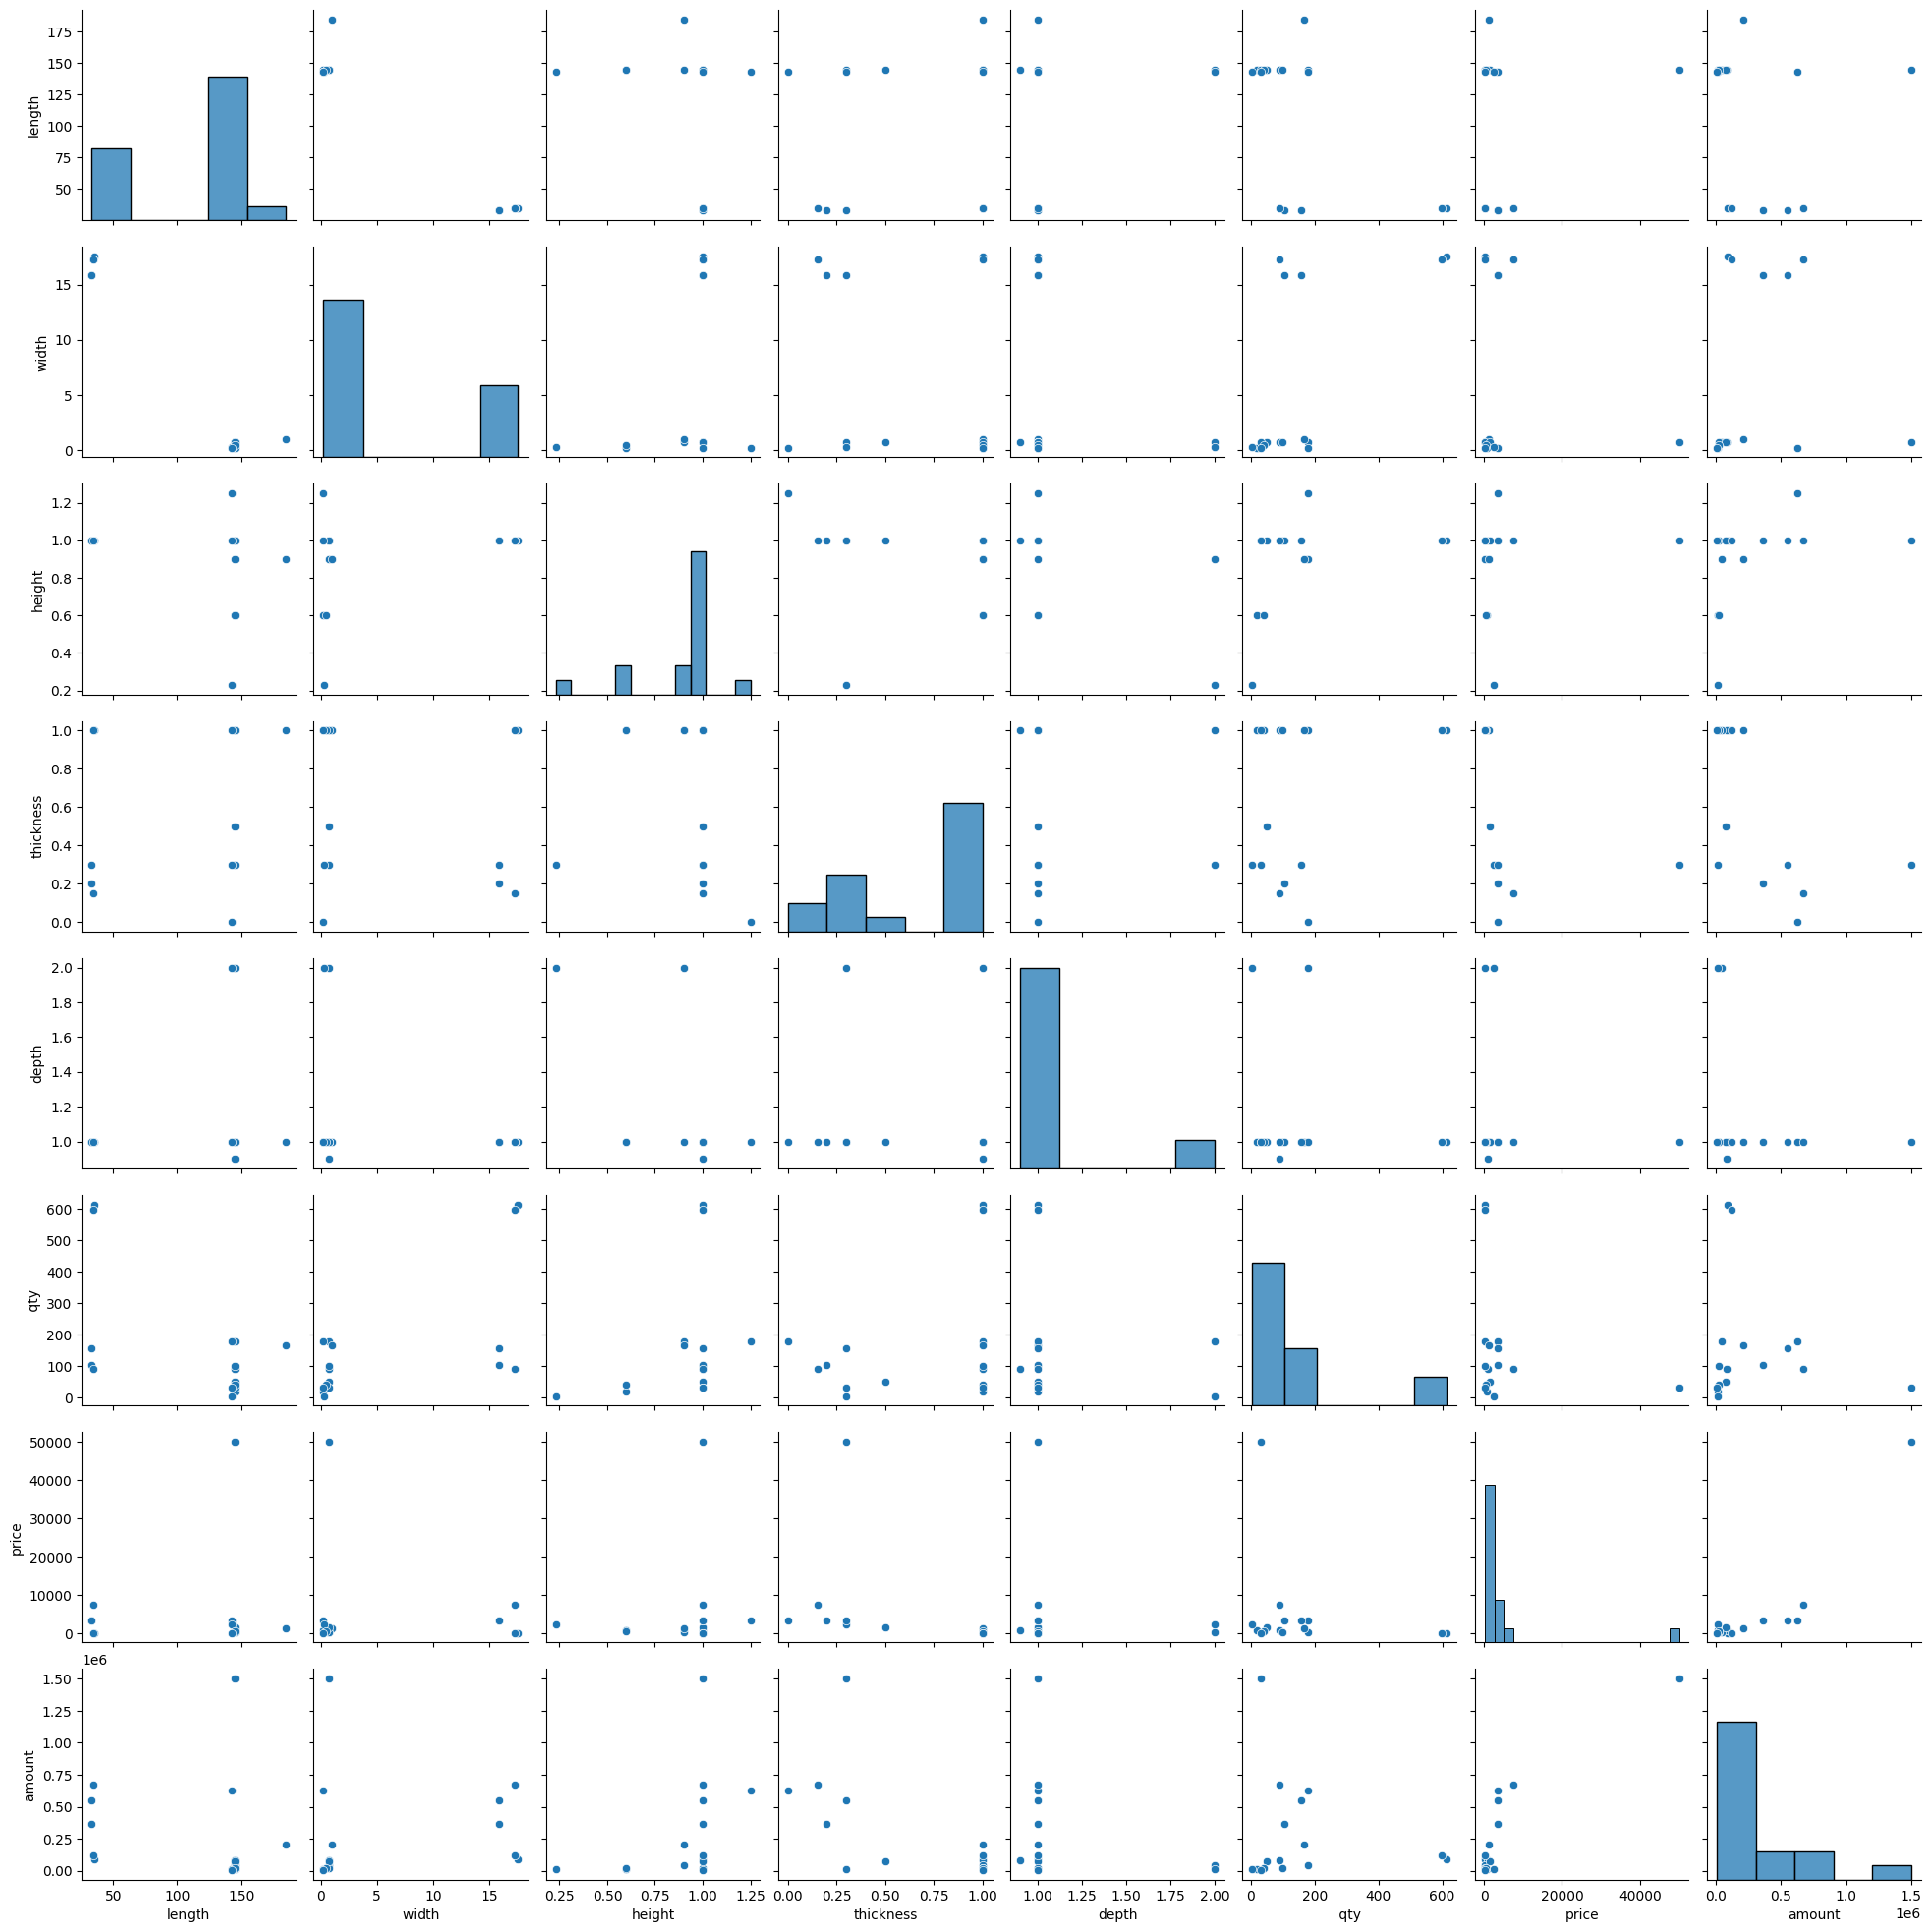

In [16]:
#visualise the data
#import seaborn library
import seaborn as sns
sns.pairplot(works)

<Axes: xlabel='length', ylabel='Count'>

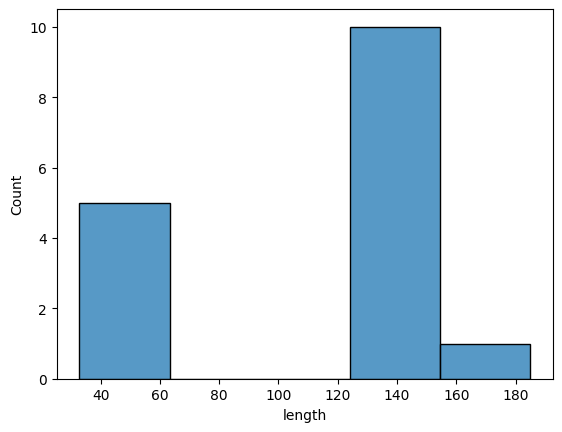

In [17]:
sns.histplot(data = works, x = "length")

<Axes: xlabel='width', ylabel='Count'>

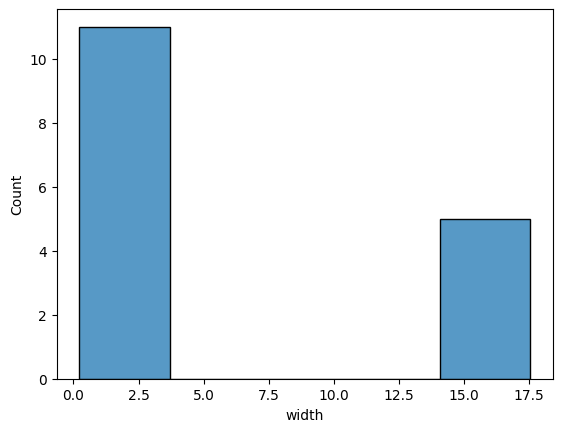

In [19]:
sns.histplot(data = works, x = "width")

<Axes: xlabel='height', ylabel='Count'>

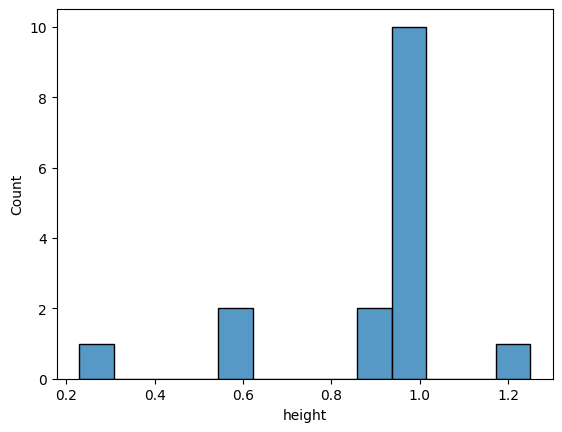

In [20]:
sns.histplot(data = works, x = "height")

<Axes: xlabel='thickness', ylabel='Count'>

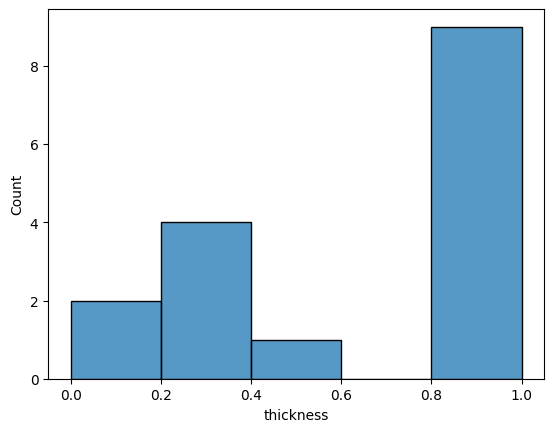

In [21]:
sns.histplot(data = works, x = "thickness")

<ipython-input-22-449eabf186a5>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = works, x = "length", y = "width", hue = "thickness")
<ipython-input-22-449eabf186a5>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = works, x = "length", y = "width", hue = "thickness")
<ipython-input-22-449eabf186a5>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = works, x = "length", y = "width", hue = "thickness")
<ipython-input-22-449eabf186a5>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = works, x = "length", y = "width", hue = "thickness")


<Axes: xlabel='length', ylabel='width'>

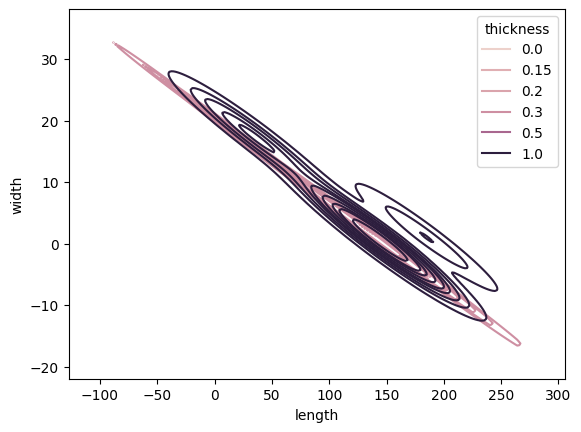

In [22]:
sns.kdeplot(data = works, x = "length", y = "width", hue = "thickness")

<ipython-input-23-448ff89c41b4>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = works, x = "length", y = "height", hue = "thickness")
<ipython-input-23-448ff89c41b4>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = works, x = "length", y = "height", hue = "thickness")
<ipython-input-23-448ff89c41b4>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = works, x = "length", y = "height", hue = "thickness")
<ipython-input-23-448ff89c41b4>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = works, x = "length", y = "height", hue = "thickness")


<Axes: xlabel='length', ylabel='height'>

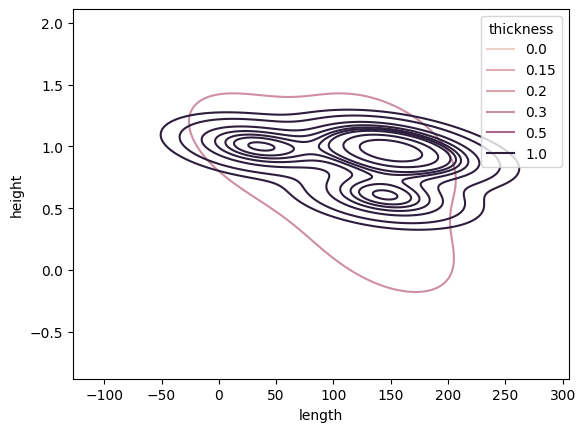

In [23]:
sns.kdeplot(data = works, x = "length", y = "height", hue = "thickness")

<ipython-input-24-465a2f0888ea>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = works, x = "length", y = "depth", hue = "thickness")
<ipython-input-24-465a2f0888ea>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = works, x = "length", y = "depth", hue = "thickness")
<ipython-input-24-465a2f0888ea>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = works, x = "length", y = "depth", hue = "thickness")
<ipython-input-24-465a2f0888ea>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = works, x = "length", y = "depth", hue = "thickness")


<Axes: xlabel='length', ylabel='depth'>

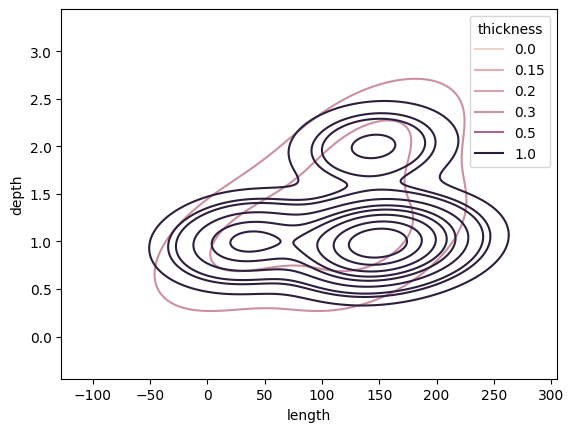

In [24]:
sns.kdeplot(data = works, x = "length", y = "depth", hue = "thickness")

<ipython-input-25-31502d30cd0e>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = works, x = "width", y = "height", hue = "depth")
<ipython-input-25-31502d30cd0e>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = works, x = "width", y = "height", hue = "depth")


<Axes: xlabel='width', ylabel='height'>

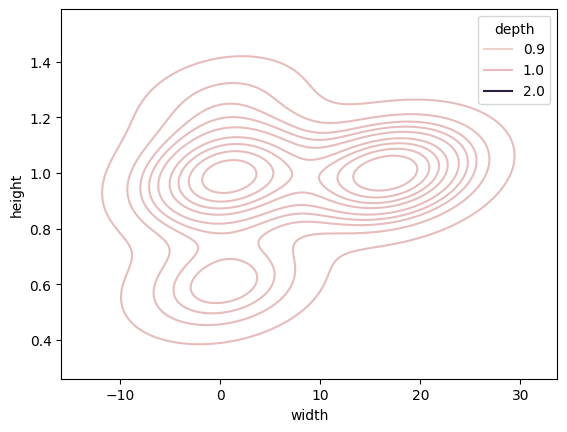

In [25]:
sns.kdeplot(data = works, x = "width", y = "height", hue = "depth")

<ipython-input-26-018ac934bc93>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = works, x = "width", y = "depth", hue = "thickness")
<ipython-input-26-018ac934bc93>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = works, x = "width", y = "depth", hue = "thickness")
<ipython-input-26-018ac934bc93>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = works, x = "width", y = "depth", hue = "thickness")
<ipython-input-26-018ac934bc93>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = works, x = "width", y = "depth", hue = "thickness")


<Axes: xlabel='width', ylabel='depth'>

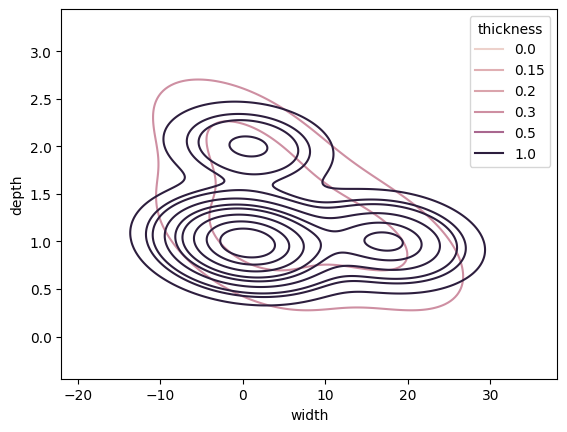

In [26]:
sns.kdeplot(data = works, x = "width", y = "depth", hue = "thickness")

In [27]:
#dependant and independent variable
X = works.iloc[:, :-1]
y = works.iloc[:,-1]

In [28]:
X.head()

,length,width,height,thickness,depth,qty,price
0,35.0,17.56,1.0,1.0,1.0,614.60,150.0
1,145.0,0.69,1.0,1.0,0.9,90.05,950.0
2,145.0,0.23,0.6,1.0,1.0,20.01,750.0
3,145.0,0.69,0.9,1.0,2.0,180.09,250.0
4,185.0,1.00,0.9,1.0,1.0,166.50,1250.0


In [29]:
y.head()

0     92190.00
1     85542.75
2     15007.50
3     45022.50
4    208125.00
Name: amount, dtype: float64

In [30]:
X

,length,width,height,thickness,depth,qty,price
0,35.00,17.56,1.00,1.00,1.0,614.60,150.0
1,145.00,0.69,1.00,1.00,0.9,90.05,950.0
2,145.00,0.23,0.60,1.00,1.0,20.01,750.0
3,145.00,0.69,0.90,1.00,2.0,180.09,250.0
4,185.00,1.00,0.90,1.00,1.0,166.50,1250.0
5,145.00,0.69,1.00,1.00,1.0,100.05,250.0
6,145.00,0.69,1.00,0.50,1.0,50.03,1500.0
7,145.00,0.69,1.00,0.30,1.0,30.02,50000.0
8,143.00,0.23,1.25,0.00,1.0,178.75,3500.0
9,143.00,0.25,0.23,0.30,2.0,4.83,2500.0


In [31]:
y

0       92190.00
1       85542.75
2       15007.50
3       45022.50
4      208125.00
5       25012.50
6       75037.50
7     1500750.00
8      625625.00
9       12065.63
10      22011.00
11       6578.00
12     119784.40
13     547907.64
14     365271.76
15     673787.25
Name: amount, dtype: float64

In [32]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [35]:
X_train.shape

(12, 7)

In [36]:
y_train.shape

(12,)

In [37]:
X_train

array([[-1.71424822,  1.59917846,  0.48970129, -0.85173036, -0.4472136 ,
         0.1769504 , -0.18433006],
       [ 0.4498563 , -0.61414393,  0.48970129,  0.95954433, -0.4472136 ,
        -0.61838577, -0.43010347],
       [ 0.4498563 , -0.61414393,  1.456217  , -1.62799095, -0.4472136 ,
         0.31973273, -0.18433006],
       [ 0.4498563 , -0.6113154 , -2.4871671 , -0.85173036,  2.23606798,
        -0.79885749, -0.25880685],
       [ 0.48915364, -0.61414393, -1.05672384,  0.95954433, -0.4472136 ,
        -0.70122524, -0.38914123],
       [-1.67809467,  1.79434682,  0.48970129, -1.23986066, -0.4472136 ,
        -0.25210407,  0.11357711],
       [ 1.27510044, -0.50524564,  0.10309501,  0.95954433, -0.4472136 ,
         0.24094518, -0.35190284],
       [ 0.48915364, -0.54908781,  0.48970129, -0.85173036, -0.4472136 ,
        -0.63684456,  3.27884072],
       [ 0.48915364, -0.58161587, -1.05672384,  0.95954433, -0.4472136 ,
        -0.5725282 , -0.40403659],
       [-1.67809467,  1.7943

In [38]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [39]:
regression .fit(X_train, y_train)

LinearRegression()

In [40]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring = "neg_mean_squared_error", cv =3)

In [41]:
np.mean(validation_score)

-27613439571522.406

In [42]:
#prediction
y_pred = regression.predict(X_test)

In [43]:
y_pred

array([  35800.37858734,  166573.11217863,  -31806.07653979,
       1113333.05910716])

In [44]:
y_pred.shape

(4,)

In [45]:
#perfomance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)
print(mae)
print(mse)

378341.6996776086
235574.9648095609
143142441714.9418


In [46]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)
#display adjusted r-square
print(1 - (1 -score)*(len(y_test)- 1) / (len(y_test) - X_test.shape[1] - 1))

-7.2735543666098135
7.20516577495736


# assumptions

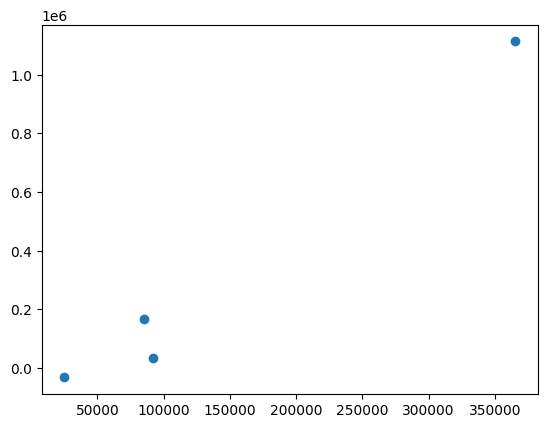

In [47]:
plt.scatter(y_test, y_pred)

In [48]:
residuals = y_test - y_pred
print(residuals)

0      56389.621413
1     -81030.362179
5      56818.576540
14   -748061.299107
Name: amount, dtype: float64


<ipython-input-49-ac18a26067d2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='amount', ylabel='Density'>

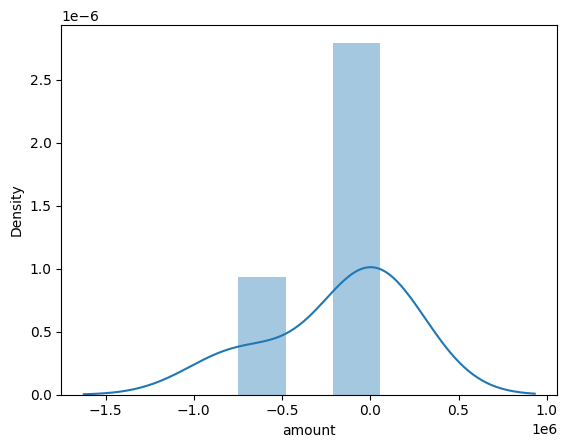

In [49]:
#plot residuals
sns.distplot(residuals)

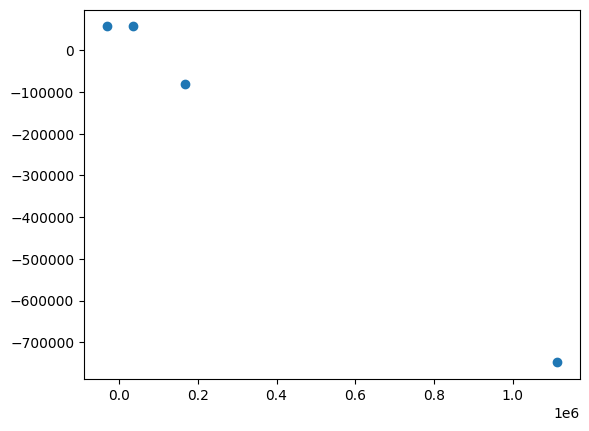

In [50]:
#scatter plot with respect to predictions and residuals
plt.scatter(y_pred, residuals)

In [ ]:
!pip install statsmodels

In [54]:
#OLS Linear regression
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [55]:
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 amount   R-squared (uncentered):                   0.622
Model:                            OLS   Adj. R-squared (uncentered):              0.093
Method:                 Least Squares   F-statistic:                              1.177
Date:                Tue, 05 Sep 2023   Prob (F-statistic):                       0.444
Time:                        01:48:06   Log-Likelihood:                         -169.52
No. Observations:                  12   AIC:                                      353.0
Df Residuals:                       5   BIC:                                      356.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.486e+05   6.49e+05      0.229      0.828   -1.52e+06    1.82e+06
x2          2.031e+05    6.8e+05      0.299      0.777   -1.55e+06    1.95e+06
x3          8.484e+04    2.1e+05      0.405      0.702   -4.54e+05    6.23e+05
x4          -1.25e+05      2e+05     -0.624      0.560    -6.4e+05     3.9e+05
x5         -1.348e+04   1.93e+05     -0.070      0.947   -5.09e+05    4.82e+05
x6         -1.771e+04   2.34e+05     -0.076      0.943    -6.2e+05    5.85e+05
x7          3.225e+05   1.66e+05      1.939      0.110   -1.05e+05     7.5e+05
==============================================================================
Omnibus:                        6.576   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                2.978
Skew:                          -1.132   Prob(JB):                        0.226
Kurtosis:                       3.912   Cond. No.                         10.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
print(regression.coef_)

[ 148588.38114859  203148.54527143   84835.30541583 -125024.32852959
  -13482.49121568  -17713.6567007   322481.33859763]


In [58]:
print(regression.intercept_)

320975.11833333335
